In [3]:
# PCA(Principal Component Analysis)
# 여러 변수간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
# 가장 높은 분산을 가지는 데이터의 축을 찾아 이축으로 차원을 축소

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF["target"] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


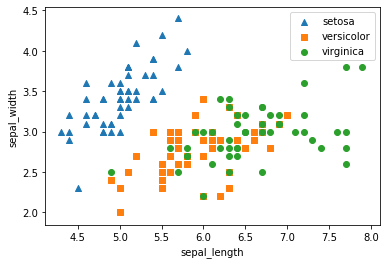

In [6]:
# setosat는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ["^", "s", "o"]

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF["target"] == i]["sepal_length"]
    y_axis_data = irisDF[irisDF["target"] == i]["sepal_width"]
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

In [8]:
# PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받는다.
# 따라서 각 속성값을 동일한 스케일로 변환하는 것이 필요
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

# fit()과 transfrom()을 호출해 PCA변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [10]:
# PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ["pca_component_1", "pca_component_2"]
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca["target"] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


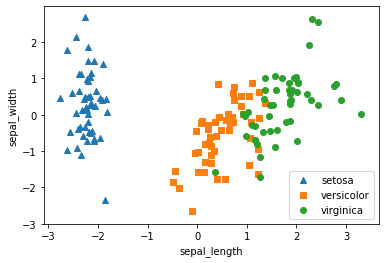

In [17]:
# setosat는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ["^", "s", "o"]

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca["target"] == i]["pca_component_1"]
    y_axis_data = irisDF_pca[irisDF_pca["target"] == i]["pca_component_2"]
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

In [18]:
# 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율을 제공
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring = "accuracy", cv = 3)
print("원본 데이터 교차 검증 개별 정확도:", scores)
print("원본 데이터 평균 정확도:", np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [21]:
pca_x = irisDF_pca.iloc[:, :-1]
scores_pca = cross_val_score(rcf, pca_x, iris.target, scoring = "accuracy", cv = 3)
print("PCA 변환 데이터 교차 검증 개별 정확도:", scores_pca)
print("PCA 변환 데이터 평균 정확도:", np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


In [22]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
df = pd.read_excel("../../data/credit_card.xls", header = 1, sheet_name="Data").iloc[:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [23]:
df.rename(columns = {"PAY_0":"PAY_1", "default payment next month":"default"},inplace = True)
y_target = df["default"]
x_features = df.drop("default", axis = 1)

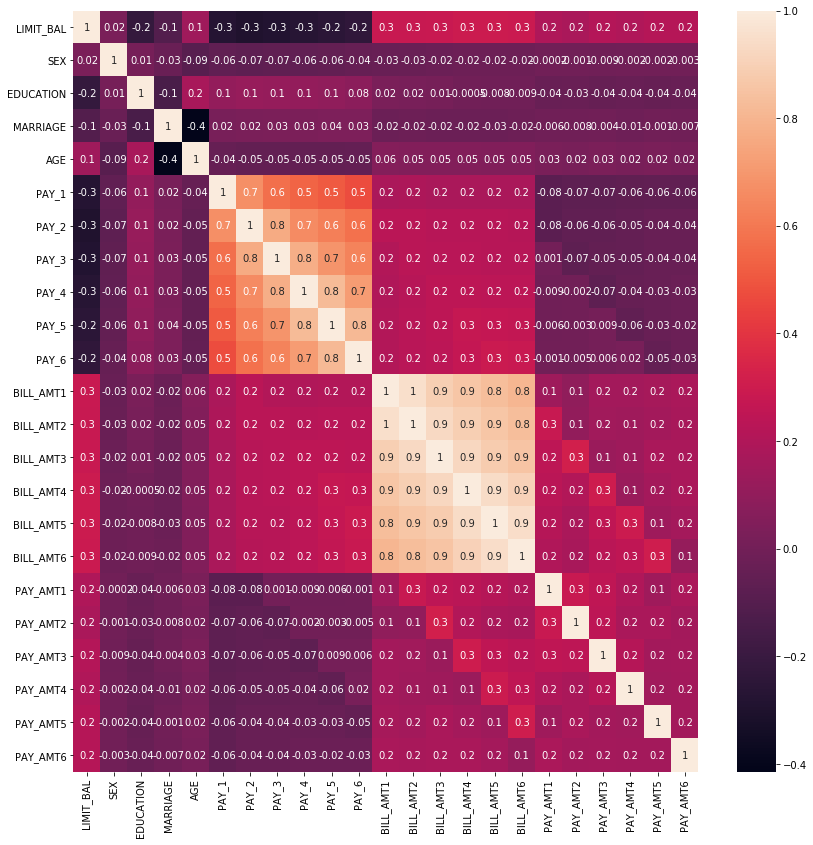

In [24]:
corr = x_features.corr()
plt.figure(figsize = (14, 14))
sns.heatmap(corr, annot = True, fmt = ".1g")

In [28]:
# 높은 상관도를 가진 속성들은 소수의 PCA만으로 자연스럽게 이 속성들의 변동성을 수용할 수 있음
# BILL_AMT1 ` BILL_AMT6까지 6개의 속성명 생성
cols_bill = [f"BILL_AMT{i}" for i in range(1, 7)]
print("대상 속성명:", cols_bill)

# 2개의 PCA속성을 가진 PCA 객체 생성하고, explained_varicance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(x_features[cols_bill])
pca = PCA(n_components = 2)
pca.fit(df_cols_scaled)
print("PCA Component별 변동성:", pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [29]:
rcf = RandomForestClassifier(n_estimators = 300, random_state = 156)
scores = cross_val_score(rcf, x_features, y_target, scoring = "accuracy", cv = 3)

print("CV=3 인 경우의 개별 Fold세트별 정확도:", scores)
print("평균 정확도:[0:.4f]".format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:[0:.4f]


In [30]:
# 원본 데이터 세트에 먼저 StandaradSclaer 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(x_features)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행.
pca = PCA(n_components = 6)
df_pca = pca.fit_transform(df_scaled)
score_pca = cross_val_score(rcf, df_pca, y_target, scoring = "accuracy", cv = 3)
print("CV=3 인 경우의 개별 Fold세트별 정확도:", scores)
print("평균 정확도:[0:.4f]".format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:[0:.4f]


In [35]:
# from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape

image_shape

(87, 65)

In [36]:
import matplotlib.pyplot as plt

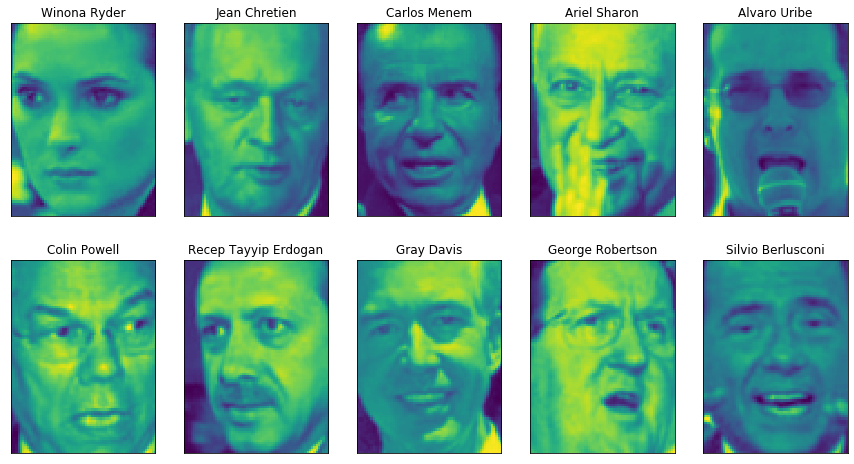

In [41]:
fig, axs = plt.subplots(2, 5, figsize = (15, 8),
                       subplot_kw = {"xticks":(), "yticks":()})

for target, image, ax in zip(people.target, people.images, axs.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [42]:
people.images.shape

(3023, 87, 65)

In [44]:
counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end = "  ")
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemin                20  John Ashcroft              53

In [45]:
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
x_people = people.data[mask]
y_people = people.target[mask]
x_people = x_people / 255.

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_people, y_people,
                                                   stratify = y_people, random_state = 0)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(x_test, y_test)))


1-최근접 이웃의 테스트 세트 점수: 0.23


In [52]:
pca = PCA(n_components = 100, whiten = True, random_state = 0).fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

print("x_train_pca.shape:", x_train_pca.shape)

x_train_pca.shape: (1547, 100)


In [54]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train_pca, y_train)
print("테스트 세트 정확도 : {:.2f}".format(knn.score(x_test_pca, y_test)))

테스트 세트 정확도 : 0.31


In [56]:
print("pca.components_.shape", pca.components_.shape)

pca.components_.shape (100, 5655)


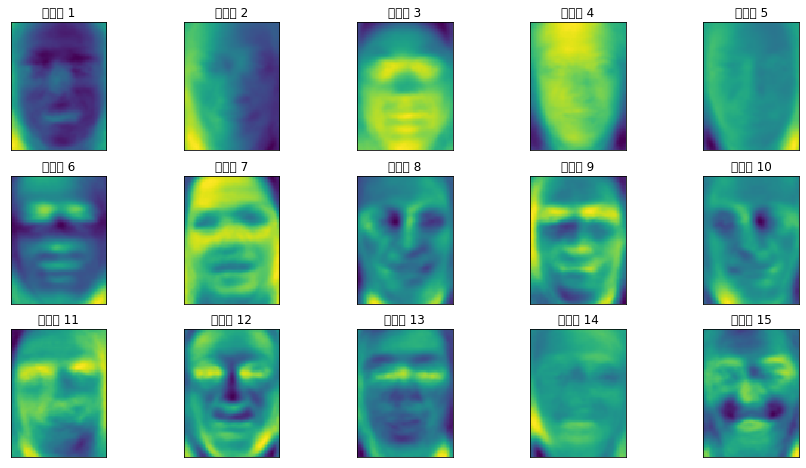

In [57]:
fig, axs = plt.subplots(3, 5, figsize = (15, 8),
                       subplot_kw = {"xticks":(), "yticks":()})

for i, (component, ax) in enumerate(zip(pca.components_, axs.ravel())):
    ax.imshow(component.reshape(image_shape), cmap="viridis")
    ax.set_title("주성분 {}".format((i + 1)))